# **Aerofit Case Study**

# **Initial Steps to read and clean Data**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')

In [15]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'
data = pd.read_csv(url)
productCost = { 'Product' : ['KP281', 'KP481', 'KP781'], 'unitCost' :[1500,1750,2500]}
df = pd.DataFrame(productCost)
data = data.merge(df, on = 'Product', how='inner')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,unitCost
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [16]:
#Checking for Null Values.
data.info() 
# No Null Values found.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
 9   unitCost       180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 15.5+ KB


# **Data Description**

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0
unitCost,180.0,1805.555556,387.978895,1500.0,1500.00,1750.0,1750.00,2500.0


In [18]:
data.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


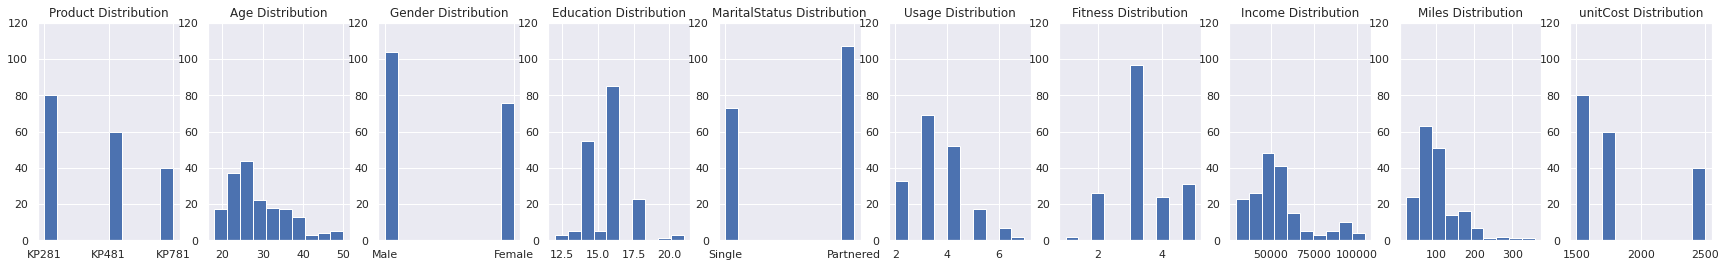

In [19]:
#Creating Histogram for overall data
plt.figure(figsize=(30,4))
columns = data.columns
for index, column in enumerate(columns):
  plt.subplot(1,10,index+1)
  data[column].hist()
  plt.ylim(0, 120)
  plt.title(column + ' Distribution')
plt.show()

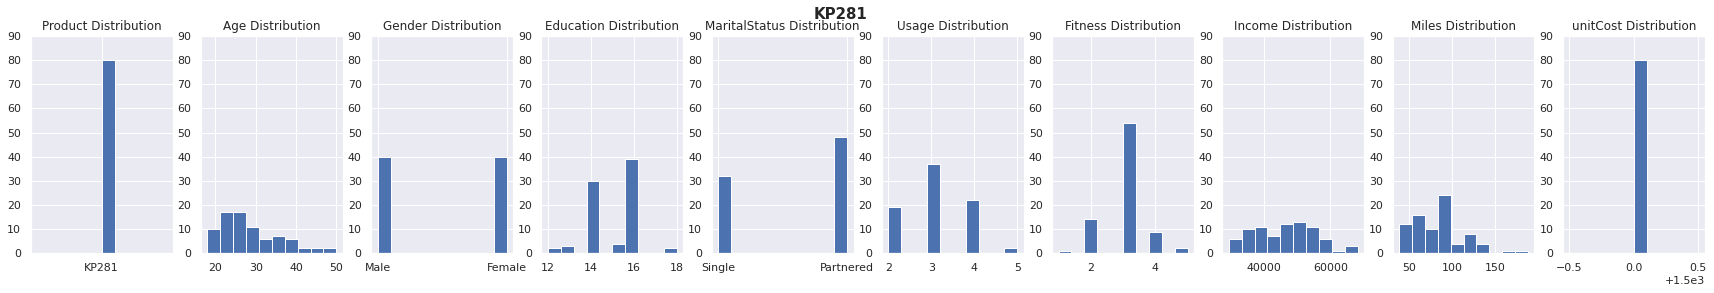

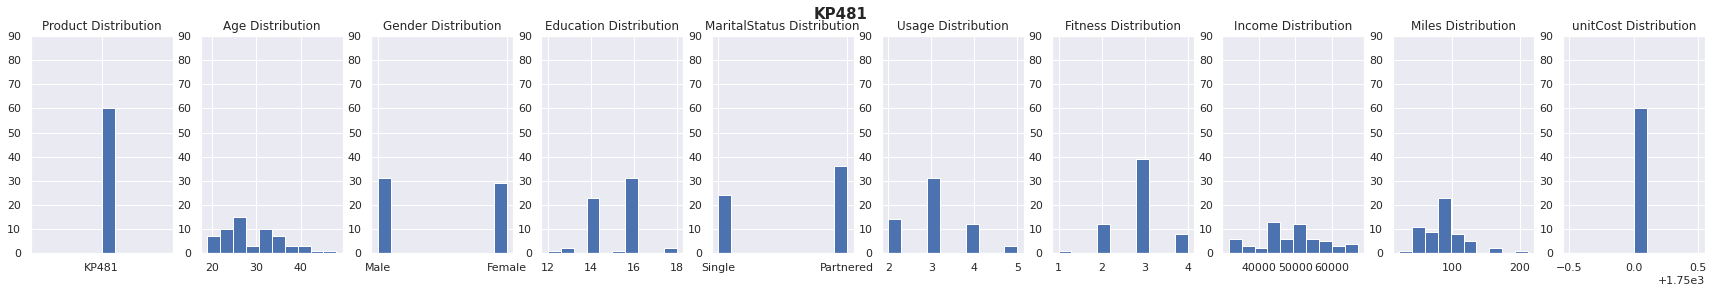

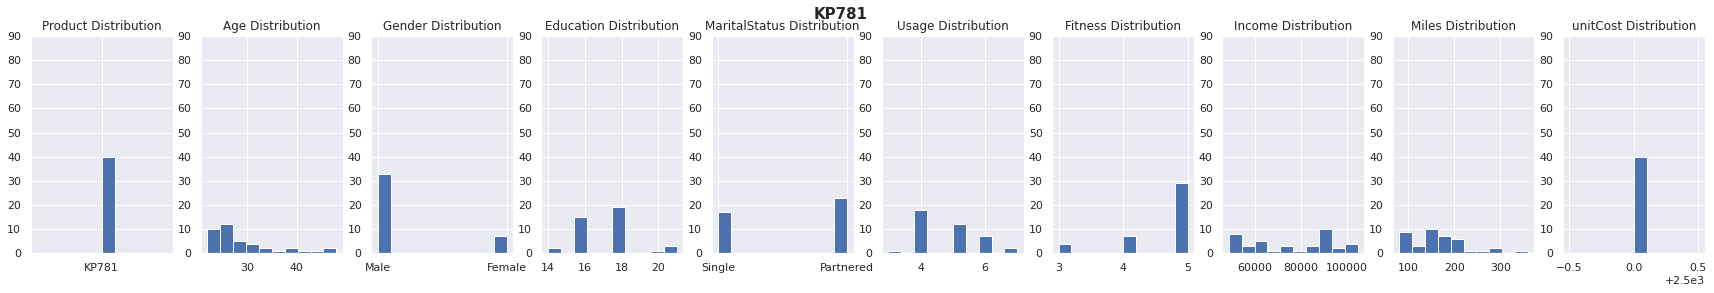

In [20]:
#Creating Histograms for each product type
product_types = data['Product'].unique()

for product in product_types:
  data1 = data.loc[data['Product'] ==product ]
  plt.figure(figsize=(30,4))
  columns = data1.columns
  for index, column in enumerate(columns):
    plt.subplot(1,10,index+1)
    data1[column].hist()
    plt.ylim(0, 90)
    plt.suptitle(product, fontsize = 15, fontweight = 'bold')
    plt.title(column + ' Distribution')
  plt.show()

## **Insights from Statistical Measures & Histograms**

####**Continuous Variables** ([`Age`,`Income`, `Miles`])


--> Age is between (18, 50). **Age of 75% customers is below 33** (i.e. majority of customers are young). Cutomers with Age between 30-40 (young) almost don't buy KP781. They prefer KP281 & KP481.

--> **Mean Income of customers is ~54k. Also 75% of customers have income below ~58K (i.e. near to mean / Distribution is Right Skewed).** Proportion of high income customers is less. Product KP781 is mostly bought by customers with Income > 50k. Majorly because KP781 is comparatively costly.

--> **Mean Miles of customers is 103. Also 75% of customers have Miles below 115 (i.e. near to mean / Distribution is Right Skewed).** Miles of KP781 customers is comparatively higher (i.e. above 100).

---


####**Categorical Nominal Variables** ([`Product`, `Gender`, `MaritalStatus`])


--> Ratio of Males:Females = (104 : 76). Product KP281 & KP481 are bought by both. **Whereas negligible percentage of Females uses KP781**.

--> Ratio of Partnered:Single = (107 : 73). **All 3 products are bought by Partnered more w.r.t. Single**.

---

####**Categorical Ordinal Variables** ([`Education`, `Usage`,`Fitness` ])
--> Education level of customers is between (12, 21). **75% of Customers have Education <= 16**. Customers with Education < 14 don't prefer KP781. Whereas Customers with Education >= 18 don't prefer KP481 & KP281. Customers with Education 18,20 prefer KP781. Customers with Education (14, 16) uses all 3 products.

--> Usage mean is 3.4 & median is 3 (i.e. near to mean). **Majority of cutomers use Products 3 to 4 times in a week (i.e. alternating days)**. However Usage of KP781 is higher wrt to KP481 & KP281

--> Maximum customers have Fitness = 3 (i.e. average, neither too fat nor too Fit). Customers with Fitness = 3 mostly buy KP481 & KP281. As the Fitness value increases of cutomer (i.e. = 5), they prefer KP781. 

---

## **Revenue Distribution of Products**

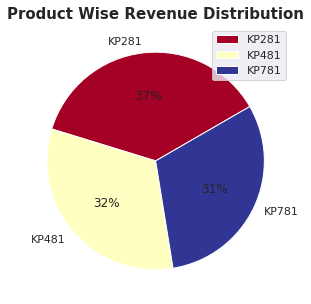

In [42]:
product_wise_revenue = pd.pivot_table(data, index = 'Product', values = 'unitCost', aggfunc = 'sum' )
plot = product_wise_revenue.plot.pie(y='unitCost', figsize=(5, 5), autopct='%1.0f%%', startangle=30, cmap = 'RdYlBu')
plt.ylabel('')
plt.title('Product Wise Revenue Distribution', fontsize = 15, fontweight = 'bold')
plt.show()

**All three Products contribute almost equally to overall Revenue. Hence Equal importance should be given to all three products.**

---

##**Correlation Heatmap**

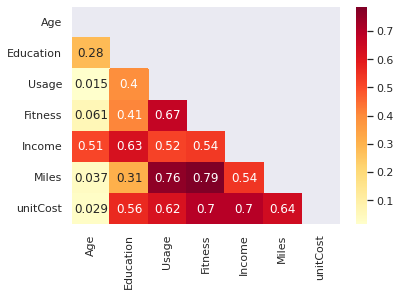

In [22]:
corr = data.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot = True, mask = mask, cmap = 'YlOrRd')
plt.show()


**--> Miles & Usage are highly correlated.** 

**--> Miles and Fitness are highly correlated**

---


## **Product vs Age**

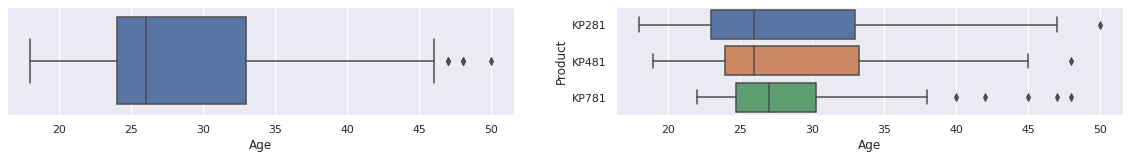

In [23]:
plt.figure(figsize=(20, 2))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = 'Age')
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Age', y = 'Product')
plt.show()

**Outliers are on Right side for overall Age & for each Product. Hence it is logical to remove outliers in this case**



In [24]:
data_age_product = data[['Product', 'Age']].copy(deep = True)
Q1 = data_age_product.loc[data_age_product['Product'] == 'KP281', 'Age'].quantile(0.25)
Q3 = data_age_product.loc[data_age_product['Product'] == 'KP281', 'Age'].quantile(0.75)
IQR = Q3-Q1
low = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
data_age_product = data_age_product.loc[(data_age_product['Age'] > low) & (data_age_product['Age'] < up)]
data_age_product.shape[0] , low, up
#3 Outliers were removed

(177, 8.0, 48.0)

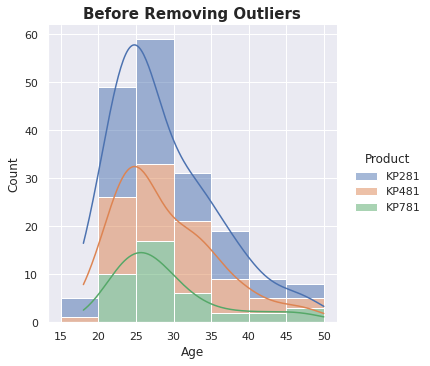

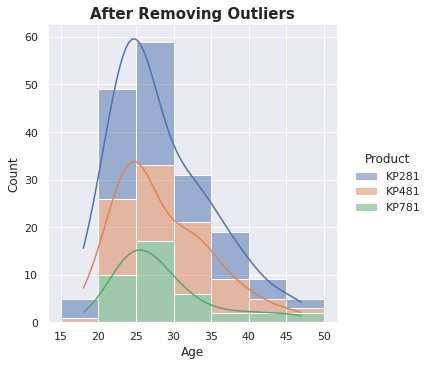

In [25]:
agebins = [15,20,25,30,35,40,45,50]
sns.displot(data, x= 'Age', hue="Product", multiple="stack", kde = True, bins = agebins)
plt.title('Before Removing Outliers', fontsize = 15, fontweight = 'bold')
sns.displot(data_age_product, x= 'Age',  hue="Product", multiple="stack", kde = True, bins = agebins)
plt.title('After Removing Outliers', fontsize = 15, fontweight = 'bold' )
plt.show()

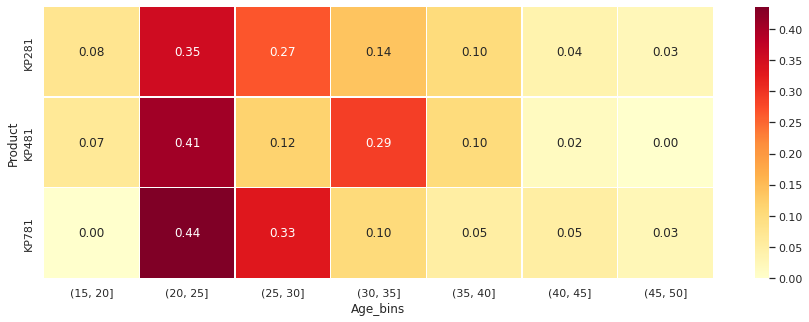

In [111]:
#Heatmap with Marginal Probability is shown
plt.figure(figsize=(15, 5))
data_age_product['Age_bins'] = pd.cut(x=data_age_product['Age'], bins=agebins)
product_age = pd.crosstab(data_age_product.Product, data_age_product.Age_bins, normalize='index')
sns.heatmap(product_age,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.show()

**Age Group (20-25] & (25-30] has highest marginal Probability for all three products.**

---


## **Product vs Income**

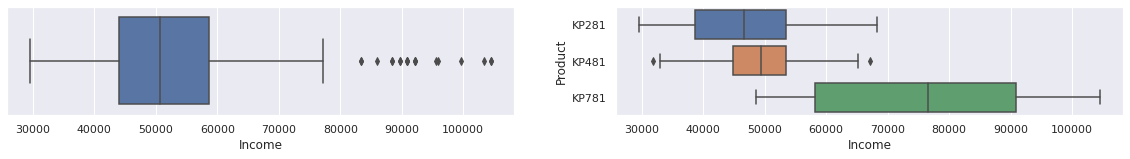

In [27]:
plt.figure(figsize=(20, 2))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = 'Income')
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Income', y = 'Product')
plt.show()

**In this case Outliers should not be removed, as People with higher income prefer KP781, which is not Outlier if we go product wise**

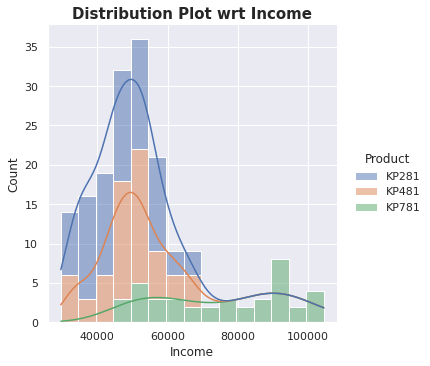

In [28]:
incomebins = [20000, 40000, 60000, 80000, 100000, 120000]
sns.displot(data = data, x= 'Income', hue="Product", multiple="stack", kde = True)
plt.title('Distribution Plot wrt Income', fontsize = 15, fontweight = 'bold')
plt.show()

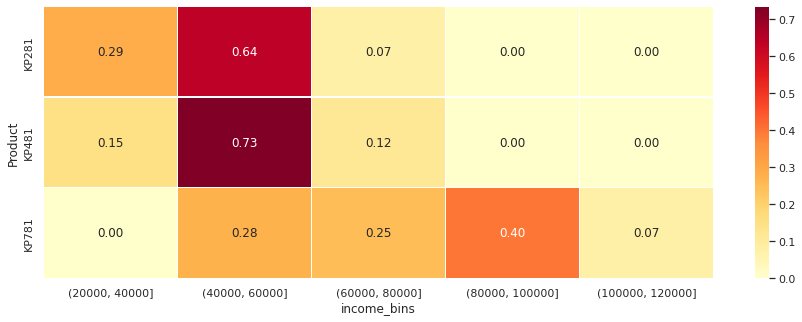

In [112]:
data_income_product = data[['Product', 'Income']].copy(deep = True)
data_income_product['income_bins'] = pd.cut(x=data_income_product['Income'], bins=incomebins)
product_income = pd.crosstab(data_income_product.Product, data_income_product.income_bins, normalize='index')
plt.figure(figsize=(15, 5))
sns.heatmap(product_income,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.show()

**Product KP281: Highest marginal probability (i.e. 64%) for customers with income range (40k to 60k).**

**Product KP481: Highest marginal probability (i.e. 73%) for customers with income range (40k to 60k).**

**Product KP781: Highest marginal probability (i.e. 40%) for customers with income range (80k to 100k).**

---


## **Product vs Miles**

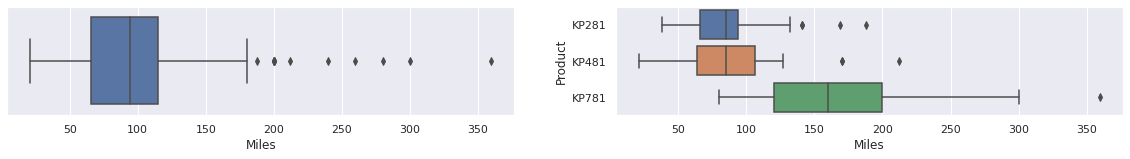

In [30]:
plt.figure(figsize=(20, 2))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = 'Miles')
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Miles', y = 'Product')
plt.show()

**Outliers are on Right side for overall Miles & for each Product. Hence it is logical to remove outliers in this case**

In [31]:
data_miles_product = data[['Product', 'Miles']].copy(deep = True)
Q1 = data_miles_product.loc[data_miles_product['Product'] == 'KP781', 'Miles'].quantile(0.25)
Q3 = data_miles_product.loc[data_miles_product['Product'] == 'KP781', 'Miles'].quantile(0.75)
IQR = Q3-Q1
low = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
data_miles_product = data_miles_product.loc[(data_miles_product['Miles'] > low) & (data_miles_product['Miles'] < up)]
data_miles_product.shape[0] , low, up
#1 Outlier were removed

(179, 0.0, 320.0)

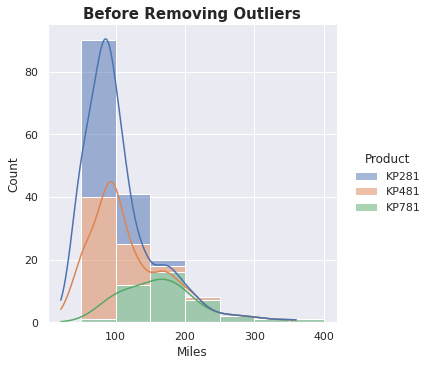

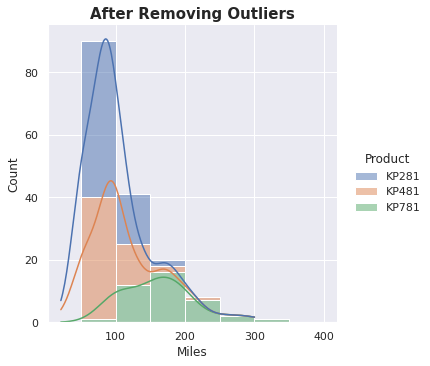

In [32]:
milesbins = [50,100,150,200,250,300,350,400]
sns.displot(data, x= 'Miles', hue="Product", multiple="stack", kde = True, bins = milesbins)
plt.title('Before Removing Outliers', fontsize = 15, fontweight = 'bold')
sns.displot(data_miles_product, x= 'Miles',  hue="Product", multiple="stack", kde = True, bins = milesbins)
plt.title('After Removing Outliers', fontsize = 15, fontweight = 'bold' )
plt.show()

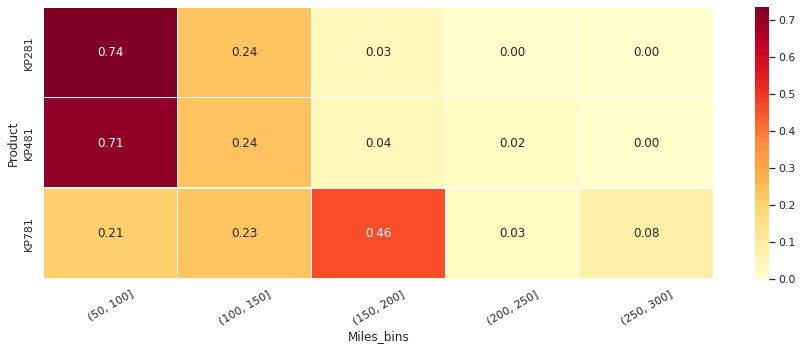

In [33]:
#Heatmap with Marginal Probability is shown
plt.figure(figsize=(15, 5))
data_miles_product['Miles_bins'] = pd.cut(x=data_miles_product['Miles'], bins=milesbins)
product_miles = pd.crosstab(data_miles_product.Product, data_miles_product.Miles_bins, normalize='index')
sns.heatmap(product_miles,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.xticks(rotation=30)
plt.show()

**Product KP281: Highest marginal probability (i.e. 74%) for customers with Miles range (50 to 100).**

**Product KP481: Highest marginal probability (i.e. 71%) for customers with Miles range (50 to 100).**

**Product KP781: Highest marginal probability (i.e. 46%) for customers with Miles range (150 to 200).**


---


## **Product vs Gender**

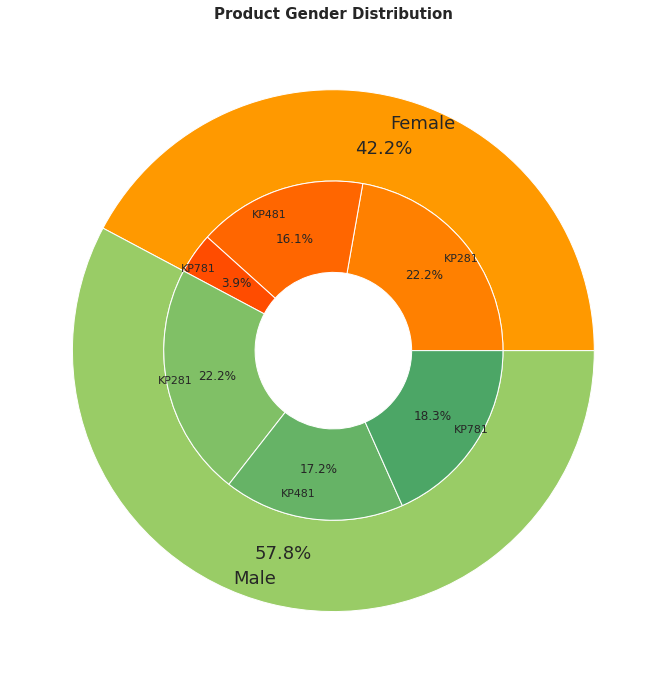

In [81]:
outer_product_gender = pd.pivot_table(data, index = ['Gender'], values = 'Miles', aggfunc = 'count' )
inner_product_gender = pd.pivot_table(data, index = ['Gender','Product'], values = 'Miles', aggfunc = 'count' )
inner_labels = inner_product_gender.index.get_level_values(1)
a,b = [plt.cm.autumn, plt.cm.summer]
outer_colors = [a(.6), b(.6)]
inner_colors = [a(.5), a(.4), a(.3), b(.5), b(.4), b(.3)]

plt.figure(figsize=(24, 12))
size = 0.35
plt.pie(outer_product_gender.values.flatten(), radius=1, labels=outer_product_gender.index, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), colors=outer_colors, pctdistance = 0.8, labeldistance = 0.9, textprops={'fontsize': 18 })
plt.pie(inner_product_gender.values.flatten(), radius=1-size, labels = inner_labels, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), colors=inner_colors, pctdistance = 0.7, labeldistance = 0.85)

plt.title('Product Gender Distribution', fontsize = 15, fontweight = 'bold' )
plt.show()

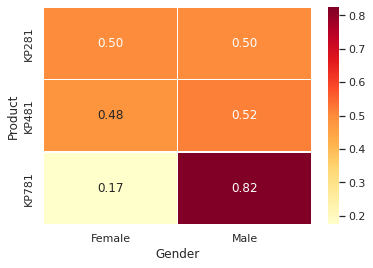

In [91]:
data_gender_product = data[['Product', 'Gender']].copy(deep = True)
product_gender = pd.crosstab(data_gender_product.Product, data_gender_product.Gender, normalize='index')
sns.heatmap(product_gender,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.show()

**Product KP281: Equal marginal probability between Male & Female customers.**

**Product KP481: Almost Equal marginal probability between Male & Female customers.**

**Product KP781: Male customers have higher marginal probability (i.e. 82%).**


---


## **Product vs Marital Status**

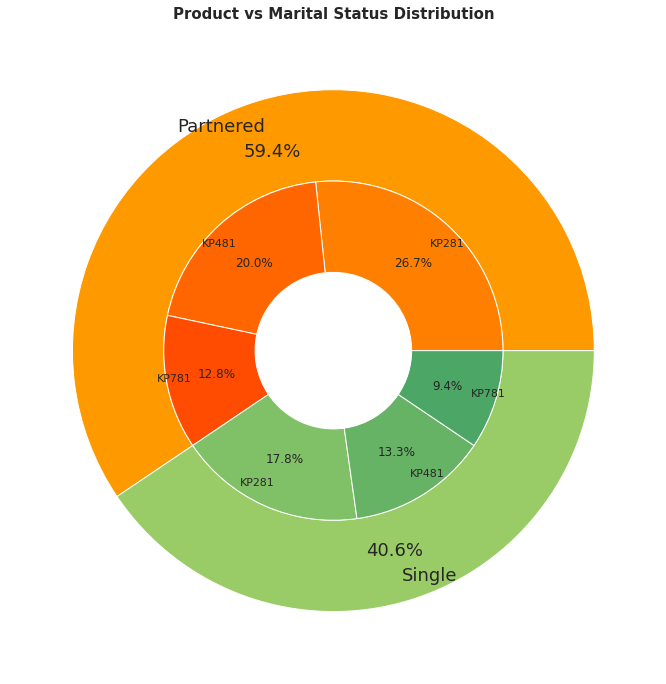

In [88]:
outer_product_maritalstatus = pd.pivot_table(data, index = ['MaritalStatus'], values = 'Miles', aggfunc = 'count' )
inner_product_maritalstatus = pd.pivot_table(data, index = ['MaritalStatus','Product'], values = 'Miles', aggfunc = 'count' )
inner_labels = inner_product_maritalstatus.index.get_level_values(1)
a,b = [plt.cm.autumn, plt.cm.summer]
outer_colors = [a(.6), b(.6)]
inner_colors = [a(.5), a(.4), a(.3), b(.5), b(.4), b(.3)]

plt.figure(figsize=(24, 12))
size = 0.35
plt.pie(outer_product_maritalstatus.values.flatten(), radius=1, labels=outer_product_maritalstatus.index, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), colors=outer_colors, pctdistance = 0.8, labeldistance = 0.9, textprops={'fontsize': 18 })
plt.pie(inner_product_maritalstatus.values.flatten(), radius=1-size, labels = inner_labels, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), colors=inner_colors, pctdistance = 0.7, labeldistance = 0.85)

plt.title('Product vs Marital Status Distribution', fontsize = 15, fontweight = 'bold' )
plt.show()

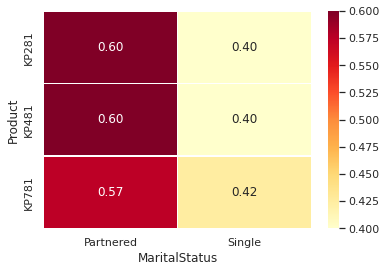

In [90]:
data_maritalstatus_product = data[['Product', 'MaritalStatus']].copy(deep = True)
product_maritalstatus = pd.crosstab(data_maritalstatus_product.Product, data_maritalstatus_product.MaritalStatus, normalize='index')
sns.heatmap(product_maritalstatus,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.show()

**Product KP281: Higher marginal probability (i.e 60%) for Partnered customers.**

**Product KP481: Higher marginal probability (i.e 60%) for Partnered customers.**

**Product KP781: Higher marginal probability (i.e 57%) for Partnered customers.**


---

## **Product vs Education**

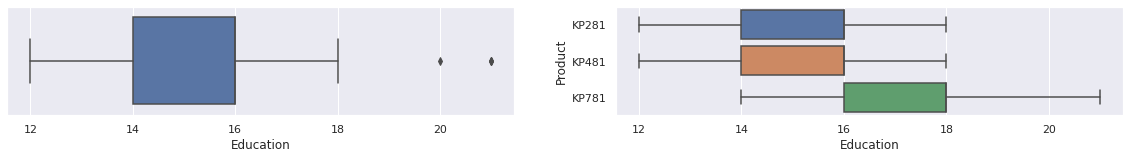

In [92]:
plt.figure(figsize=(20, 2))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = 'Education')
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Education', y = 'Product')
plt.show()

**In this case Outliers should not be removed, as People with higher education prefer KP781, which is not Outlier if we go product wise**

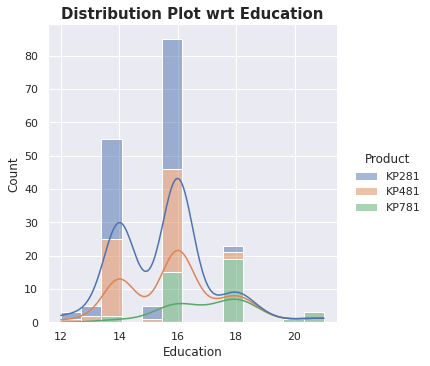

In [96]:
educationbins = [10, 12, 14, 16, 18, 20, 22]
sns.displot(data = data, x= 'Education', hue="Product", multiple="stack", kde = True)
plt.title('Distribution Plot wrt Education', fontsize = 15, fontweight = 'bold')
plt.show()

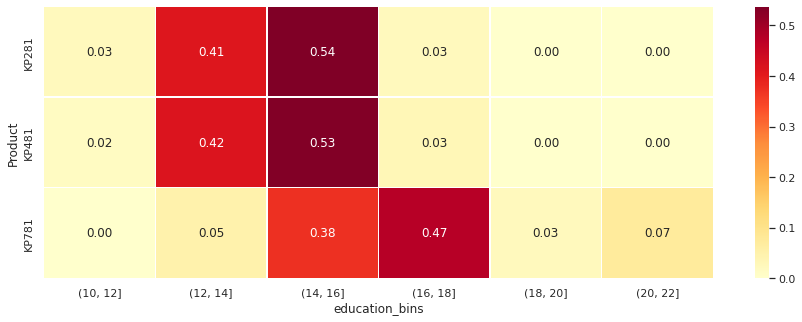

In [98]:
data_education_product = data[['Product', 'Education']].copy(deep = True)
data_education_product['education_bins'] = pd.cut(x=data_education_product['Education'], bins=educationbins)
product_education = pd.crosstab(data_education_product.Product, data_education_product.education_bins, normalize='index')
plt.figure(figsize=(15, 5))
sns.heatmap(product_education,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.show()

**Product KP281: Highest marginal probability (i.e. 95%) for customers with Education range (12 to 16].**

**Product KP481: Highest marginal probability (i.e. 95%) for customers with Education range (12 to 16].**

**Product KP781: Highest marginal probability (i.e. 85%) for customers with Education range (14 to 18].**


---


## **Product vs Usage**

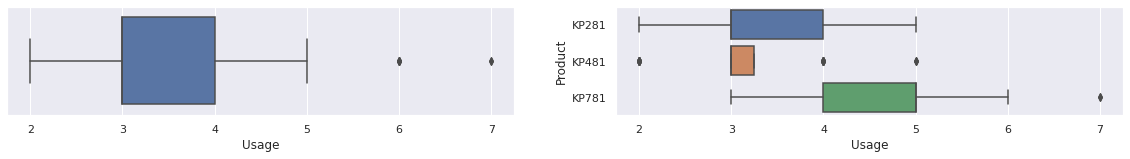

In [99]:
plt.figure(figsize=(20, 2))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = 'Usage')
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Usage', y = 'Product')
plt.show()

**Outliers are on Right side for overall Usage & for each Product. Hence it is logical to remove outliers in this case**

In [101]:
data_usage_product = data[['Product', 'Usage']].copy(deep = True)
Q1 = data_usage_product.loc[data_usage_product['Product'] == 'KP781', 'Usage'].quantile(0.25)
Q3 = data_usage_product.loc[data_usage_product['Product'] == 'KP781', 'Usage'].quantile(0.75)
IQR = Q3-Q1
low = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
data_usage_product = data_usage_product.loc[(data_usage_product['Usage'] < up)]
data_usage_product.shape[0] , low, up
#2 Outliers were removed

(178, 2.5, 6.5)

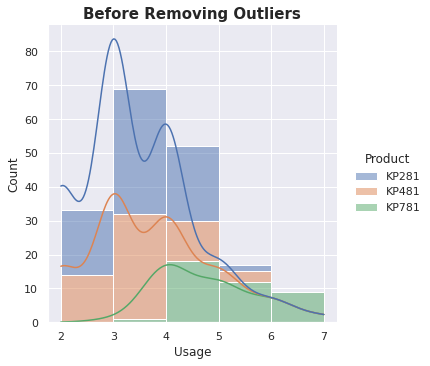

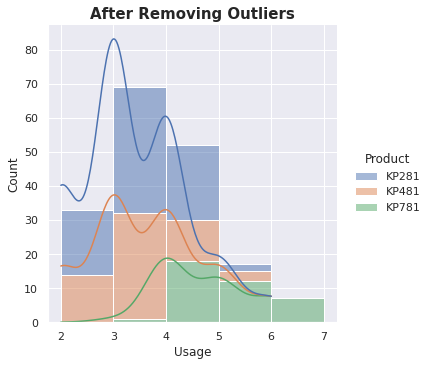

In [103]:
usagebins = [2,3,4,5,6,7]
sns.displot(data, x= 'Usage', hue="Product", multiple="stack", kde = True, bins = usagebins)
plt.title('Before Removing Outliers', fontsize = 15, fontweight = 'bold')
sns.displot(data_usage_product, x= 'Usage',  hue="Product", multiple="stack", kde = True, bins = usagebins)
plt.title('After Removing Outliers', fontsize = 15, fontweight = 'bold' )
plt.show()

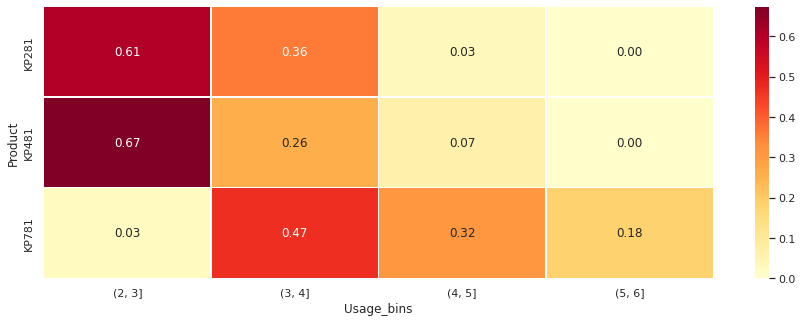

In [105]:
#Heatmap with Marginal Probability is shown
plt.figure(figsize=(15, 5))
data_usage_product['Usage_bins'] = pd.cut(x=data_usage_product['Usage'], bins=usagebins)
product_usage = pd.crosstab(data_usage_product.Product, data_usage_product.Usage_bins, normalize='index')
sns.heatmap(product_usage,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.show()

**Product KP281: Highest marginal probability (i.e. 61%) for customers with Usage range (2,3].**

**Product KP481: Highest marginal probability (i.e. 67%) for customers with Usage range (2,3].**

**Product KP781: Highest marginal probability (i.e. 47%) for customers with Usage range (3,4].**


---


## **Product vs Fitness**

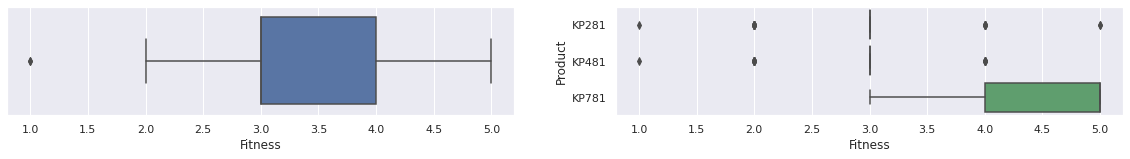

In [106]:
plt.figure(figsize=(20, 2))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = 'Fitness')
plt.subplot(1,2,2)
sns.boxplot(data = data, x = 'Fitness', y = 'Product')
plt.show()

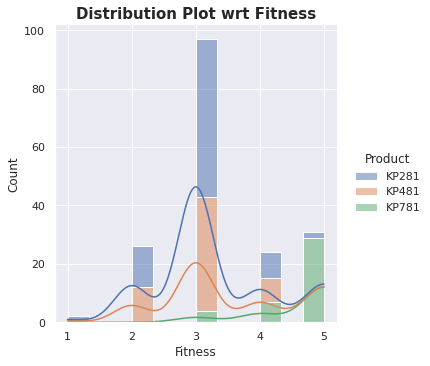

In [109]:
fitnessbins = [1, 2, 3, 4, 5,6]
sns.displot(data = data, x= 'Fitness', hue="Product", multiple="stack", kde = True)
plt.title('Distribution Plot wrt Fitness', fontsize = 15, fontweight = 'bold')
plt.show()

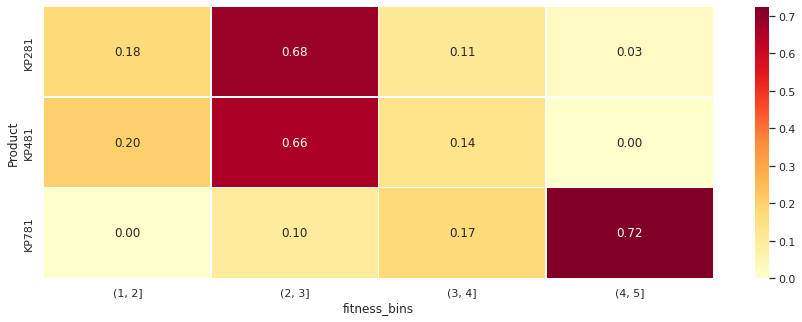

In [110]:
data_fitness_product = data[['Product', 'Fitness']].copy(deep = True)
data_fitness_product['fitness_bins'] = pd.cut(x=data_fitness_product['Fitness'], bins=fitnessbins)
product_fitness = pd.crosstab(data_fitness_product.Product, data_fitness_product.fitness_bins, normalize='index')
plt.figure(figsize=(15, 5))
sns.heatmap(product_fitness,annot = True, cmap = 'YlOrRd', linewidths=.5, fmt='.2f')
plt.show()

**Product KP281: Highest marginal probability (i.e. 68%) for customers with Fitness range (2,3].**

**Product KP481: Highest marginal probability (i.e. 66%) for customers with Fitness range (2,3].**

**Product KP781: Highest marginal probability (i.e. 72%) for customers with Usage range (4,5].**


---
